# Color Identification

#### (Soumitra Dnyaneshwar Edake)

### PROBLEM STATEMENT:-

Interns are expected to create a Tensorflow model for indentification of color. Your code will be givenan image as an input and the code is supposed to catergorize which RGB color it matches to. This code is to be done in Python

In [1]:
# imports

import os
import random
import cv2
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.engine.saving import load_model

Using TensorFlow backend.


In [2]:
# setting GPU memory growth for no memory glitches
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Dataset Creator

As no pre data set is provided, we will make one ourself

In [3]:
def create_img(color, add_other=False):
    counter = 0

    for ind in range(25, 245, 10):
        counter += 1
        if color == 'red':
            blank_image[:, 0:width] = (0, 0, ind)

        elif color == 'blue':
            blank_image[:, 0:width] = (ind, 0, 0)

        elif color == 'green':
            blank_image[:, 0:width] = (0, ind, 0)

        path_image = base + color + "_" + str(counter) + '.jpg'
        cv2.imwrite(path_image, blank_image)

        if add_other:
            tot = 0
            for c1 in range(110, 230, 120):
                for c2 in range(110, 230, 120):
                    tot += 1
                    if color == 'red':
                        blank_image[:, 0:width] = (c1, c2, ind)

                    elif color == 'blue':
                        blank_image[:, 0:width] = (ind, c1, c2)

                    elif color == 'green':
                        blank_image[:, 0:width] = (c1, ind, c2)

                    path_image = base + color + "_" + str(counter) + str(tot) + '.jpg'
                    cv2.imwrite(path_image, blank_image)

In [4]:
def get_dataset(base):
    total_images = os.listdir(base)
    total_red = [x for x in total_images if x.split('_')[0] == 'red']
    total_blue = [x for x in total_images if x.split('_')[0] == 'blue']
    total_green = [x for x in total_images if x.split('_')[0] == 'green']

    print('total images:', len(total_images))
    print('total red:', len(total_red))
    print('total blue:', len(total_blue))
    print('total green:', len(total_green))

    return total_images

In [5]:
def create_custom(value):
    # BGR
    blank_image[:, 0:width] = value
    blue, green, red = value
    #    path_image = base + "cc_" + str(value) + '.jpg'
    path_image = base + "cc_(" + str(red) + ", " + str(green) + ", " + str(blue) + ').jpg'
    cv2.imwrite(path_image, blank_image)

In [6]:
height, width = 100, 100
blank_image = np.zeros((height, width, 3), np.uint8)

In [7]:
base = 'dataset\\'
add = True
create_img('blue', add_other=add)
create_img('red', add_other=add)
create_img('green', add_other=add)
get_dataset(base)

total images: 126
total red: 42
total blue: 42
total green: 42


['blue_1.jpg',
 'blue_10.jpg',
 'blue_101.jpg',
 'blue_11.jpg',
 'blue_111.jpg',
 'blue_12.jpg',
 'blue_121.jpg',
 'blue_13.jpg',
 'blue_131.jpg',
 'blue_14.jpg',
 'blue_141.jpg',
 'blue_15.jpg',
 'blue_151.jpg',
 'blue_16.jpg',
 'blue_161.jpg',
 'blue_17.jpg',
 'blue_171.jpg',
 'blue_18.jpg',
 'blue_181.jpg',
 'blue_19.jpg',
 'blue_191.jpg',
 'blue_2.jpg',
 'blue_20.jpg',
 'blue_201.jpg',
 'blue_21.jpg',
 'blue_211.jpg',
 'blue_22.jpg',
 'blue_221.jpg',
 'blue_3.jpg',
 'blue_31.jpg',
 'blue_4.jpg',
 'blue_41.jpg',
 'blue_5.jpg',
 'blue_51.jpg',
 'blue_6.jpg',
 'blue_61.jpg',
 'blue_7.jpg',
 'blue_71.jpg',
 'blue_8.jpg',
 'blue_81.jpg',
 'blue_9.jpg',
 'blue_91.jpg',
 'green_1.jpg',
 'green_10.jpg',
 'green_101.jpg',
 'green_11.jpg',
 'green_111.jpg',
 'green_12.jpg',
 'green_121.jpg',
 'green_13.jpg',
 'green_131.jpg',
 'green_14.jpg',
 'green_141.jpg',
 'green_15.jpg',
 'green_151.jpg',
 'green_16.jpg',
 'green_161.jpg',
 'green_17.jpg',
 'green_171.jpg',
 'green_18.jpg',
 'green_181

In [8]:
len(os.listdir(base))

126

In [9]:
base = 'input\\'
for i in range(0, 100):
    create_custom((random.choice(range(0, 255)),
                   random.choice(range(0, 255)),
                   random.choice(range(0, 255))))

In [10]:
len(os.listdir(base))

100

In [11]:
base = 'dataset\\'
total_images = get_dataset(base)

total images: 126
total red: 42
total blue: 42
total green: 42


In [12]:
len(total_images)

126

In [13]:
total_images[:5]

['blue_1.jpg', 'blue_10.jpg', 'blue_101.jpg', 'blue_11.jpg', 'blue_111.jpg']

In [14]:
data = list()
for x in total_images:
    ent = [x, x.split('_')[0]]
    data.append(ent)

In [15]:
data[:5]

[['blue_1.jpg', 'blue'],
 ['blue_10.jpg', 'blue'],
 ['blue_101.jpg', 'blue'],
 ['blue_11.jpg', 'blue'],
 ['blue_111.jpg', 'blue']]

In [21]:
train = pd.DataFrame(data, columns=['image', 'color'])

In [22]:
train.head()

,image,color
0,blue_1.jpg,blue
1,blue_10.jpg,blue
2,blue_101.jpg,blue
3,blue_11.jpg,blue
4,blue_111.jpg,blue


In [23]:
train = pd.concat([train.drop('color', axis=1),
                   pd.get_dummies(train['color'],
                                  prefix='color',
                                  prefix_sep='_',
                                  dummy_na=False)],
                  axis=1)

In [24]:
train.head()

,image,color_blue,color_green,color_red
0,blue_1.jpg,1,0,0
1,blue_10.jpg,1,0,0
2,blue_101.jpg,1,0,0
3,blue_11.jpg,1,0,0
4,blue_111.jpg,1,0,0


In [25]:
train_image = []
for i in range(len(total_images)):
    img = image.load_img(base + train['image'][i])
    img = image.img_to_array(img)
    img = img / 255
    train_image.append(img)

In [26]:
len(train_image)

126

Load the data into numpy arrays

In [27]:
X = np.array(train_image)
y = np.array(train[['color_red', 'color_green', 'color_blue']])

In [28]:
y[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

## Model Training

In [29]:
model_path = 'model.h5'

In [30]:
def model_definition(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))

    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train,
              epochs=90,
              validation_data=(X_test, y_test),
              batch_size=32,
              verbose=0)

    return model

In [31]:
def pred_color(in_img, model):
    in_img = image.load_img(in_img)
    in_img = image.img_to_array(in_img)
    in_img = in_img / 255
    in_img = np.expand_dims(in_img, axis=0)

    y_hat = model.predict(in_img)

    red = y_hat[0][0]
    green = y_hat[0][1]
    blue = y_hat[0][2]

    return get_color((red, green, blue))

In [32]:
def get_color(value):
    color = None
    red, green, blue = value
    if red > blue and red > green:
        color = 'RED'

    elif blue > red and blue > green:
        color = 'BLUE'

    elif green > blue and green > red:
        color = 'GREEN'

    elif green == blue and (green > red or blue > red):
        color = 'GREEN+BLUE'

    elif green == red and (red > blue or green > blue):
        color = 'GREEN+RED'

    elif blue == red and (red > green or blue > green):
        color = 'BLUE+RED'

    elif blue == red and green == blue:

        if blue == 0:
            color = 'BLACK'
        elif blue == 255:
            color = 'WHITE'
        else:
            color = 'RED+GREEN+BLUE'

    return color

In [33]:
model = model_definition(X, y)

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1982528   
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [35]:
model.save(model_path)
print('Model saved to:', model_path)

Model saved to: model.h5


## Testing

In [36]:
def model_load():
    model_path = 'model.h5'
    if os.path.exists(model_path):
        model = load_model(model_path)
        print("Loading Model")
    else:
        print("Model not found, please train model first")

    return model

In [37]:
def run_check(image, mod):
    col = pred_color(image, mod)
    return col

In [38]:
model = model_load()

Loading Model


In [45]:
base = 'input\\'

images = os.listdir(base)
total = len(images)
accu = 0

for img_name in images:

    p_col = run_check(base + img_name, model)

    val = tuple(int(x) for x in img_name.split("(")[1].split(")")[0].split(','))
    c = get_color(val)

    print('Image:', img_name)
    print('Predicted:', p_col, '\nActual:', c)

    if c == p_col:
        accu += 1

print("\nTotal: " + str(total))
print("Accurately Predicted: " + str(accu))

Image: cc_(101, 142, 125).jpg
Predicted: GREEN 
Actual: GREEN
Image: cc_(103, 30, 40).jpg
Predicted: RED 
Actual: RED
Image: cc_(103, 89, 199).jpg
Predicted: BLUE 
Actual: BLUE
Image: cc_(105, 233, 229).jpg
Predicted: GREEN 
Actual: GREEN
Image: cc_(108, 51, 77).jpg
Predicted: RED 
Actual: RED
Image: cc_(112, 174, 43).jpg
Predicted: GREEN 
Actual: GREEN
Image: cc_(120, 205, 105).jpg
Predicted: GREEN 
Actual: GREEN
Image: cc_(121, 72, 233).jpg
Predicted: BLUE 
Actual: BLUE
Image: cc_(122, 196, 143).jpg
Predicted: GREEN 
Actual: GREEN
Image: cc_(124, 2, 102).jpg
Predicted: RED 
Actual: RED
Image: cc_(125, 8, 90).jpg
Predicted: RED 
Actual: RED
Image: cc_(129, 11, 103).jpg
Predicted: RED 
Actual: RED
Image: cc_(129, 150, 169).jpg
Predicted: BLUE 
Actual: BLUE
Image: cc_(13, 163, 158).jpg
Predicted: BLUE 
Actual: GREEN
Image: cc_(132, 17, 71).jpg
Predicted: RED 
Actual: RED
Image: cc_(140, 157, 136).jpg
Predicted: GREEN 
Actual: GREEN
Image: cc_(143, 54, 228).jpg
Predicted: BLUE 
Actual: B

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 


Bad key "text.kerning_factor" on line 4 in
D:\s0um\Softwares\Anaconda3\envs\keras-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [52]:
wrng = total - accu
wrng

4

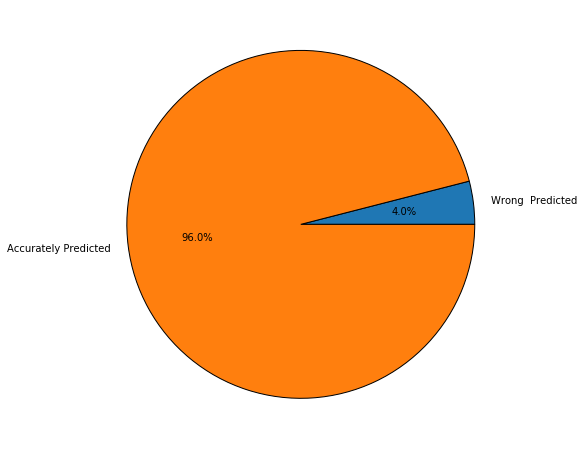

In [56]:
wrng = total - accu
labels = ['Wrong  Predicted', 'Accurately Predicted']
sizes = [Wrong_pred, accu]

plt.figure(figsize=(8,8))
plt.pie(sizes,
      labels=labels,
      autopct='%1.1f%%',
      wedgeprops={"edgecolor":"k",
                  'linewidth': 1,
                  'antialiased': True});

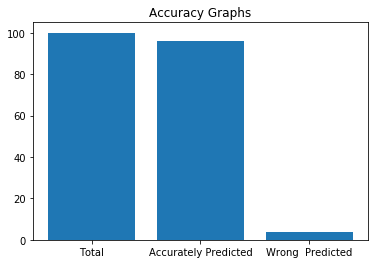

In [57]:
y_values = [total, accu, wrng]
x_labels = ['Total', 'Accurately Predicted', 'Wrong  Predicted']
plt.title('Accuracy Graphs')
plt.bar(x_labels, y_values);

We see that the model acheived 96% of accuracy, now lets try to pass a custom image create right into this notebook

## Test with a custom image

In [76]:
height, width = 100, 100
blank_image = np.zeros((height, width, 3), np.uint8)

In [77]:
# red image
img1 = blank_image
img1[:, 0:width] = (200, 10, 10)

In [78]:
img1 = np.array(img1)

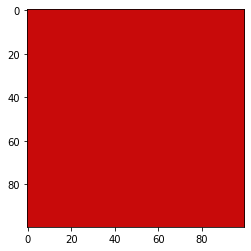

In [79]:
plt.imshow(img1)
plt.show()

In [80]:
img1.shape

(100, 100, 3)

In [81]:
in_img = img1 / 255
in_img = np.expand_dims(in_img, axis=0)

y_hat = model.predict(in_img)

red = y_hat[0][0]
green = y_hat[0][1]
blue = y_hat[0][2]

In [82]:
get_color((red, green, blue))

'RED'

In [83]:
# blue image
img2 = blank_image
img2[:, 0:width] = (123, 53, 234)

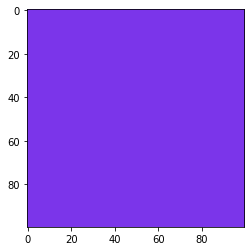

In [84]:
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

In [85]:
img2.shape

(100, 100, 3)

In [86]:
in_img = img2 / 255
in_img = np.expand_dims(in_img, axis=0)

y_hat = model.predict(in_img)

red = y_hat[0][0]
green = y_hat[0][1]
blue = y_hat[0][2]
get_color((red, green, blue))

'BLUE'

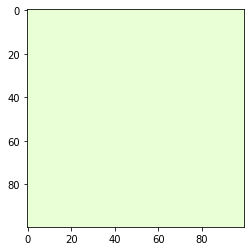

In [91]:
# green image
img3 = blank_image
img3[:, 0:width] = (233, 255, 214)
img3 = np.array(img3)
plt.imshow(img3)
plt.show()

In [92]:
in_img = img3 / 255
in_img = np.expand_dims(in_img, axis=0)

y_hat = model.predict(in_img)

red = y_hat[0][0]
green = y_hat[0][1]
blue = y_hat[0][2]
get_color((red, green, blue))

'GREEN'